In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [8]:
df = pd.read_csv('Churn_Modelling.csv')

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
x = df.iloc[:, 3:13]
y = df.iloc[:, 13]

In [11]:
geography = pd.get_dummies(x['Geography'], drop_first=True)
gender = pd.get_dummies(x['Gender'], drop_first=True)

In [12]:
gender

,Male
0,False
1,False
2,False
3,False
4,False
...,...
9995,True
9996,True
9997,False
9998,True


In [13]:
x = pd.concat([x, geography,gender], axis=1)

In [15]:
x = x.drop(['Geography','Gender'], axis=1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [17]:
# feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
classifier = Sequential()
classifier.add(Dense(units=10, kernel_initializer='he_uniform', activation='relu', input_dim=11))
classifier.add(Dropout(0.3))

classifier.add(Dense(units=20, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dropout(0.4))

classifier.add(Dense(units=15, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dropout(0.2))

classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)


Epoch 1/100
536/536 [==============================] - 4s 6ms/step - loss: 0.6260 - accuracy: 0.7332 - val_loss: 0.4905 - val_accuracy: 0.7944
Epoch 2/100
536/536 [==============================] - 3s 6ms/step - loss: 0.5231 - accuracy: 0.7873 - val_loss: 0.4743 - val_accuracy: 0.7952
Epoch 3/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4979 - accuracy: 0.7934 - val_loss: 0.4683 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4872 - accuracy: 0.7966 - val_loss: 0.4581 - val_accuracy: 0.7948
Epoch 5/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4765 - accuracy: 0.7962 - val_loss: 0.4497 - val_accuracy: 0.7952
Epoch 6/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4613 - accuracy: 0.7972 - val_loss: 0.4375 - val_accuracy: 0.7974
Epoch 7/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4560 - accuracy: 0.8013 - val_loss: 0.4281 - val_accuracy: 0.8050

In [23]:
# Extracting loss and accuracy values
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

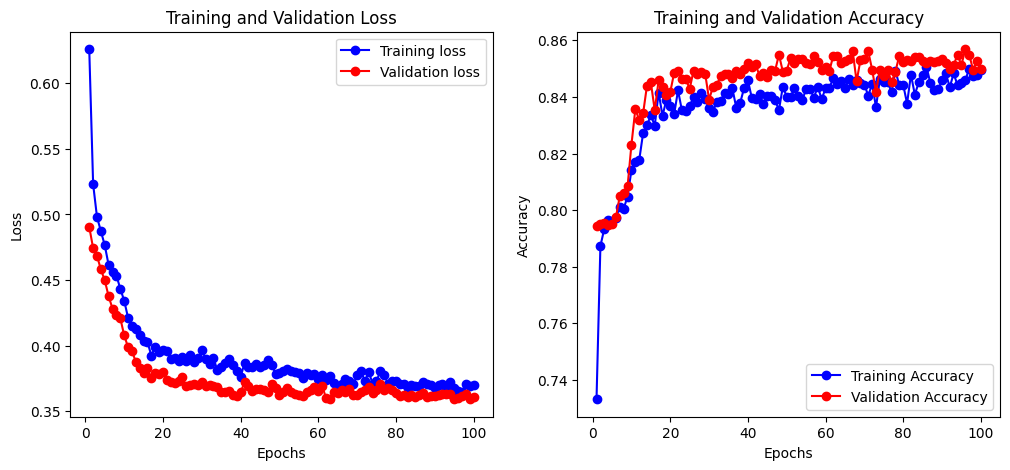

In [24]:
# Plotting the loss curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [25]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

63/63 [==============================] - 0s 2ms/step
[[1523   72]
 [ 210  195]]
0.859
